Nodos: ['aed30720-dd25-56c1-9a05-4e0e883a3f5f', '24fa3618-9cad-57f2-bfe9-045b9a091b21', '970eb91e-38d1-56e8-b5e6-6606b217b53a', '15599326-ed22-53fe-ad46-ae4221955136', '2519c59f-5b5a-57c9-8beb-cf37a97354db', '421892aa-e7ab-537b-bcdc-f34147d75183', 'c6b577d9-46f3-5d6f-8deb-5eddca369c69', '7ad4f123-9af0-55b8-8a75-bb432854a883', 'feb515b1-71e8-53b9-b344-67ce717f8138', '5e9e99b6-3466-5296-b9ef-f85382765be3', '6948b813-2a72-5d65-857b-fa8eafb64cac', 'eb9b2551-c40d-55ac-b1da-528551342743', '2912464e-ecfe-56e4-a147-f4bf686e6375', '78ce87dc-253f-5d72-83de-348759bb60ab', '603ebd6e-90cb-5c41-8f75-273d4b640eec', '0bb61880-5a36-5268-a11c-2dc8974d2a69', '8c622caf-eeaa-5771-bff2-836f429bda48', '27dcf8d7-258d-5401-85fb-ac2f5f5e38c3', '943d16d4-dd75-567a-a82e-881bef9f3895', '9e5d2716-179a-5403-847e-35ae63da0099', 'a4d97ec6-48e4-5556-997b-5280ef335fdb', '7d8bcb04-cb77-5c6a-a515-cb3e777ddafd', 'b41c687d-5d68-5c06-8265-711936498c7b', 'fecda4f1-27db-5fb4-993e-94264ff0051d', 'f731a296-7d00-5bf2-a082-8359611

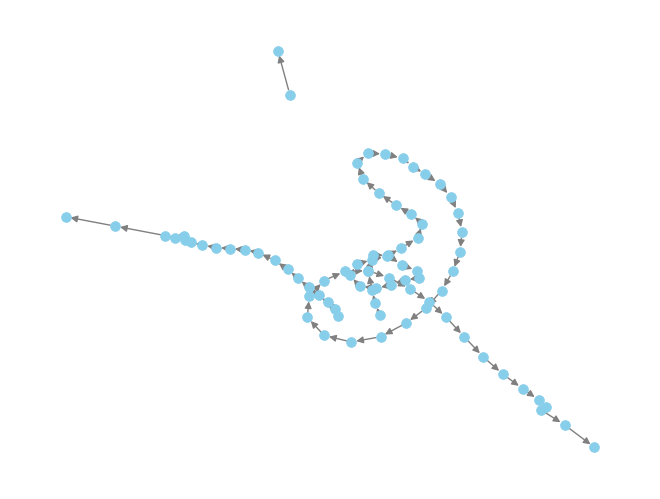

In [1]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt

def cargar_diccionarios(filename):
    with open(filename, 'rb') as file:
        diccionarios = pickle.load(file)
        return diccionarios['nodes'], diccionarios['in_edges'], diccionarios['out_edges']

def transformar_a_grafo(nodes, in_edges, out_edges):
    # Crear un grafo dirigido
    grafo = nx.DiGraph()

    # Agregar nodos con sus datos
    for node_id, data in nodes.items():
        grafo.add_node(node_id, data=data)

    # Agregar aristas de entrada con pesos
    for entrada, salidas_pesos in in_edges.items():
        for salida, peso in salidas_pesos.items():
            grafo.add_edge(entrada, salida, weight=peso)

    # Agregar aristas de salida con pesos
    for salida, entradas_pesos in out_edges.items():
        for entrada, peso in entradas_pesos.items():
            # Verificar si la arista ya existe para evitar duplicados
            if not grafo.has_edge(entrada, salida):
                grafo.add_edge(entrada, salida, weight=peso)

    return grafo

# Ejemplo de uso con diccionarios de ejemplo
nodes, in_edges, out_edges = cargar_diccionarios("vars")

grafo_resultante = transformar_a_grafo(nodes, in_edges, out_edges)

# Imprimir información del grafo
print("Nodos:", grafo_resultante.nodes(data=False))
print("Aristas con pesos:", grafo_resultante.edges(data='weight'))


nodos_con_grado = [nodo for nodo, grado in grafo_resultante.degree() if grado > 0]

# Imprimir el grafo con nodos más pequeños
pos = nx.spring_layout(grafo_resultante)  # Puedes usar diferentes algoritmos de posicionamiento
nx.draw(grafo_resultante, pos, with_labels=False, nodelist=nodos_con_grado, node_size=50, font_size=8, font_color='black', font_weight='bold', node_color='skyblue', edge_color='gray', linewidths=0.5, width=1.0, arrowsize=10)

# Mostrar el gráfico
plt.show()

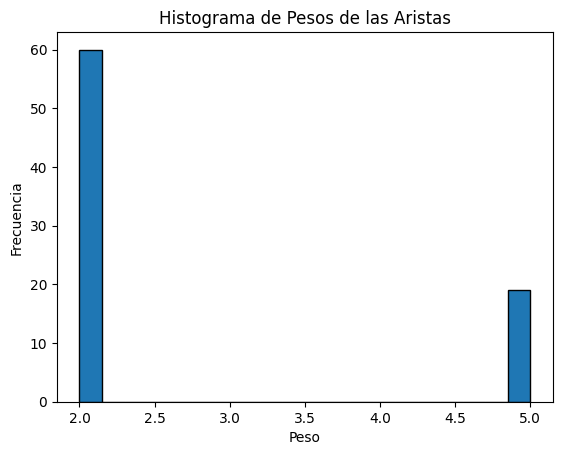

In [2]:
pesos_aristas = [grafo_resultante[entrada][salida]['weight'] for entrada, salida in grafo_resultante.edges()]

# Crear un histograma
plt.hist(pesos_aristas, bins=20, edgecolor='black')

# Configurar el gráfico
plt.title('Histograma de Pesos de las Aristas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [3]:
from MusicData import MusicData

md = MusicData()
md._songs._nodes = nodes
md._songs._in = in_edges
md._songs._out = out_edges

temp_song2 = '0c84eb21-03b8-50f7-b4ac-ee961051471b'

rnodes = 0
rvalues = 0
for s in md:
    num_nodes, values = md.get_song_distance(temp_song2,s)
    rnodes  += num_nodes
    rvalues += values

print(rnodes)
print(rvalues)

Running on: Windows (1)

171
855


In [5]:
temp_song2 = '0c84eb21-03b8-50f7-b4ac-ee961051471b'

num_aristas_acumulado = 0
peso_acumulado = 0

# Iterar sobre los nodos x
for x in md:
    # Calcular el camino más corto y sus detalles
    try:
        camino_mas_corto = nx.shortest_path(grafo_resultante, source=x, target=temp_song2, weight='weight')
    except:
        continue

    # Iterar sobre el camino más corto
    for i in range(len(camino_mas_corto) - 1):
        nodo_actual = camino_mas_corto[i]
        nodo_siguiente = camino_mas_corto[i + 1]

        # Acumular el peso de la arista entre los nodos actuales
        peso_acumulado += grafo_resultante[nodo_actual][nodo_siguiente]['weight']

        # Incrementar el contador de aristas
        num_aristas_acumulado += 1

print(num_aristas_acumulado)
print(peso_acumulado)

171
855
